In [48]:
import matplotlib.pyplot as plt
import numpy as np
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import *

In [13]:
train_data=r"E:\covid19\test_covid19"
test_data=r"E:\covid19\train_covid19"

In [14]:
classes_name=os.listdir(train_data)

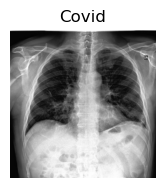

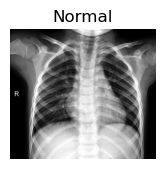

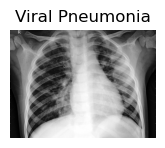

In [20]:
def plot_image(classes_name):
    plt.Figure(figsize=(15,10))
    for i,Category in enumerate(classes_name):
        img_path=train_data +'/'+Category
        img_in_folder=os.listdir(img_path)

        first_img=img_in_folder[0]
        first_img_path=img_path+'/'+first_img
        img=image.load_img(first_img_path)
        img_array=image.img_to_array(img)/255

        plt.subplot(1,3,i+1)
        plt.imshow(img_array)
        plt.title(Category)
        plt.axis("off")

        plt.show()


plot_image(classes_name)        

In [21]:
data_generator=ImageDataGenerator(
    rescale=1/255
)

In [24]:
train_generator=data_generator.flow_from_directory(
    train_data,
    batch_size=16,
    target_size=(224,224)
)

test_generator=data_generator.flow_from_directory(
    test_data,
    batch_size=1,
    target_size=(224,224)
)

Found 66 images belonging to 3 classes.
Found 251 images belonging to 3 classes.


In [26]:
train_generator.image_shape

(224, 224, 3)

In [31]:
model=Sequential()

model.add(Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=[224,224,3]))
model.add(MaxPool2D())

model.add(Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(64,activation='relu'))

model.add(Dense(3,activation='softmax'))


c:\Users\SHREEN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary

<bound method Model.summary of <Sequential name=sequential_2, built=True>>

In [37]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [38]:
model.fit(train_generator,validation_data=test_generator,epochs=5)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.3030 - loss: 11.4751 - val_accuracy: 0.6972 - val_loss: 0.8354
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.6364 - loss: 1.0973 - val_accuracy: 0.6853 - val_loss: 0.8961
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.5758 - loss: 0.7765 - val_accuracy: 0.6096 - val_loss: 0.8335
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.9242 - loss: 0.3843 - val_accuracy: 0.6414 - val_loss: 0.7828
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 1.0000 - loss: 0.1324 - val_accuracy: 0.7888 - val_loss: 0.4583


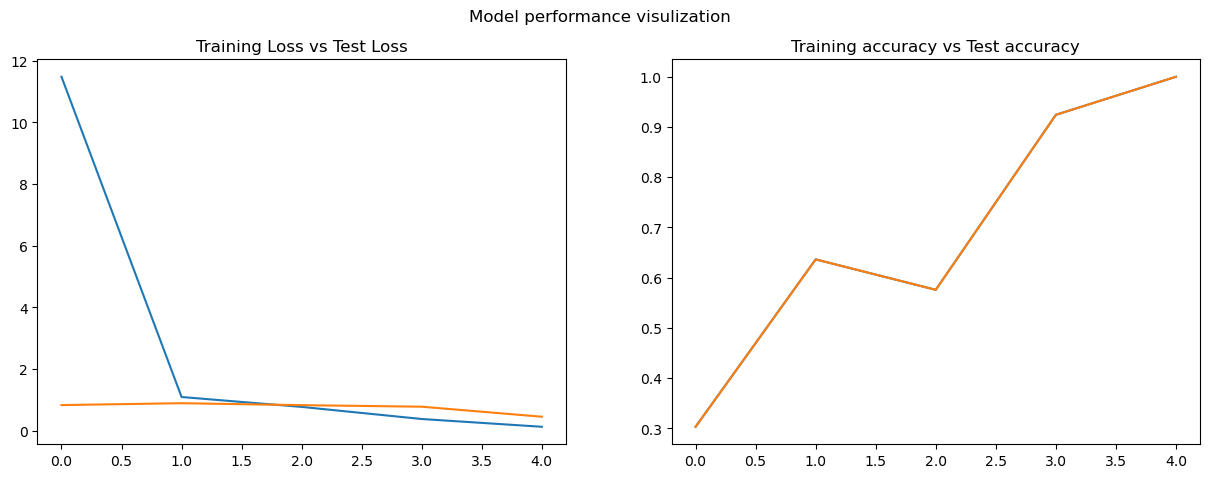

In [44]:
fig,ax=plt.subplots(1,2,figsize=[15,5])
fig.suptitle("Model performance visulization")
ax[0].plot(model.history.history["loss"],label="Training Loss")
ax[0].plot(model.history.history["val_loss"],label="Test Loss")

ax[0].set_title("Training Loss vs Test Loss")

ax[1].plot(model.history.history["accuracy"],label="Training accuracy")
ax[1].plot(model.history.history["accuracy"],label="Test accuracy")

ax[1].set_title("Training accuracy vs Test accuracy")

plt.show()


In [46]:
testing_image=r"E:\covid19\test_covid19\Covid\098.jpeg"
class_map=dict([value,key] for key,value in train_generator.class_indices.items() )
class_map

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [51]:
def predication_image(testing_image,actual_label):
    test_image=image.load_img(testing_image,target_size=(224,224))
    test_image_arr=image.img_to_array(test_image)/255
    test_image_input=test_image_arr.reshape(
        1,
        test_image_arr.shape[0],
        test_image_arr.shape[1],
        test_image_arr.shape[2]
    )

    prediction_class=np.argmax(model.predict(test_image_input))
    predication_map=class_map[prediction_class]
    plt.figure(figsize=[10,5])
    plt.imshow(test_image_arr)
    plt.axis("off")

    plt.title(f"Actual label :{actual_label} |predict label:{predication_map}")

In [53]:
model.save("Coved.keras")

In [54]:
!pip install streamlit